# Parkinsons Telemonitoring Data Set Analysis and Model Training

I would start by Importing my necessary libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Importing the Parkinsons Telemonitoring data set optained from http://archive.ics.uci.edu/ml/machine-learning-databases/parkinsons/telemonitoring/parkinsons_updrs.data

Data extract technique was used to get data from this location and properly transformed into the csv file used here. It was an important step especially with the exponential data representation in the originl data for some variables.

In [9]:
dataset = pd.read_csv("parkinsons_updrs.data.csv")
dataset

,subject#,age,sex,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,...,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
0,1,72,0,5.64310,28.199,34.398,0.00662,0.000034,0.00401,0.00317,...,0.230,0.01438,0.01309,0.01662,0.04314,0.014290,21.640,0.41888,0.54842,0.160060
1,1,72,0,12.66600,28.447,34.894,0.00300,0.000017,0.00132,0.00150,...,0.179,0.00994,0.01072,0.01689,0.02982,0.011112,27.183,0.43493,0.56477,0.108100
2,1,72,0,19.68100,28.695,35.389,0.00481,0.000025,0.00205,0.00208,...,0.181,0.00734,0.00844,0.01458,0.02202,0.020220,23.047,0.46222,0.54405,0.210140
3,1,72,0,25.64700,28.905,35.810,0.00528,0.000027,0.00191,0.00264,...,0.327,0.01106,0.01265,0.01963,0.03317,0.027837,24.445,0.48730,0.57794,0.332770
4,1,72,0,33.64200,29.187,36.375,0.00335,0.000020,0.00093,0.00130,...,0.176,0.00679,0.00929,0.01819,0.02036,0.011625,26.126,0.47188,0.56122,0.193610
5,1,72,0,40.65200,29.435,36.870,0.00353,0.000023,0.00119,0.00159,...,0.214,0.01006,0.01337,0.02263,0.03019,0.009438,22.946,0.53949,0.57243,0.195000
6,1,72,0,47.64900,29.682,37.363,0.00422,0.000024,0.00212,0.00221,...,0.445,0.02376,0.02621,0.03488,0.07128,0.013260,22.506,0.49250,0.54779,0.175630
7,1,72,0,54.64000,29.928,37.857,0.00476,0.000025,0.00226,0.00259,...,0.212,0.00979,0.01462,0.01911,0.02937,0.027969,22.929,0.47712,0.54234,0.238440
8,1,72,0,61.66900,30.177,38.353,0.00432,0.000029,0.00156,0.00207,...,0.371,0.01774,0.02134,0.03451,0.05323,0.013381,22.078,0.51563,0.61864,0.200370
9,1,72,0,68.68800,30.424,38.849,0.00496,0.000027,0.00258,0.00253,...,0.310,0.02030,0.01970,0.02569,0.06089,0.018021,22.606,0.50032,0.58673,0.201170


Initail Analysis and understanding of the dataset 

To identify anomalies, a summary of the dataset statistics would provide me with a quick inspection of each column

In [10]:
dataset.describe()

,subject#,age,sex,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,...,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
count,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,...,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000
mean,21.494128,64.804936,0.317787,92.863722,21.296229,29.018942,0.006154,0.000044,0.002987,0.003277,...,0.310960,0.017156,0.020144,0.027481,0.051467,0.032120,21.679495,0.541473,0.653240,0.219589
std,12.372279,8.821524,0.465656,53.445602,8.129282,10.700283,0.005624,0.000036,0.003124,0.003732,...,0.230254,0.013237,0.016664,0.019986,0.039711,0.059692,4.291096,0.100986,0.070902,0.091498
min,1.000000,36.000000,0.000000,-4.262500,5.037700,7.000000,0.000830,0.000002,0.000330,0.000430,...,0.026000,0.001610,0.001940,0.002490,0.004840,0.000286,1.659000,0.151020,0.514040,0.021983
25%,10.000000,58.000000,0.000000,46.847500,15.000000,21.371000,0.003580,0.000022,0.001580,0.001820,...,0.175000,0.009280,0.010790,0.015665,0.027830,0.010955,19.406000,0.469785,0.596180,0.156340
50%,22.000000,65.000000,0.000000,91.523000,20.871000,27.576000,0.004900,0.000035,0.002250,0.002490,...,0.253000,0.013700,0.015940,0.022710,0.041110,0.018448,21.920000,0.542250,0.643600,0.205500
75%,33.000000,72.000000,1.000000,138.445000,27.596500,36.399000,0.006800,0.000053,0.003290,0.003460,...,0.365000,0.020575,0.023755,0.032715,0.061735,0.031463,24.444000,0.614045,0.711335,0.264490
max,42.000000,85.000000,1.000000,215.490000,39.511000,54.992000,0.099990,0.000446,0.057540,0.069560,...,2.107000,0.162670,0.167020,0.275460,0.488020,0.748260,37.875000,0.966080,0.865600,0.731730


The statistics result shows no missing data as the count are all the same at 5875. No null data in any cell (0 for sex column represents a gender [1 or 0]) and there are no standout point to portray anomalies in the dataset

Carrying out further data analysis and mining 

From observing the dataset, I could make an initial assumption that certain features play an important role in dertermining the UPDRS score. Age for instance is a likely posssiblity.

To understand how age relates to the UPDRS, I would use a box plot on both the motor_UPDRS and total_UPDRS against age

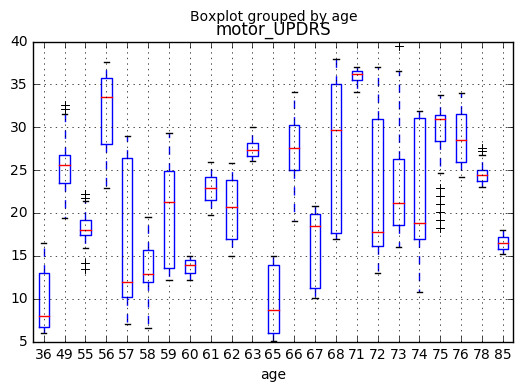

In [12]:
%matplotlib inline
dataset.boxplot(column='motor_UPDRS', by='age')

UPDRS is a clinical scale and the lower the UPDRS score, the healthier the subject. As I would expect, the subject at 36 years has a much lower motor_UPDRS score (lowest in this data set) compared to the subject at 71 years (highest motor_UPDRS in this dataset)

Using a similar box plot to understand the age relationship to total_UPDRS

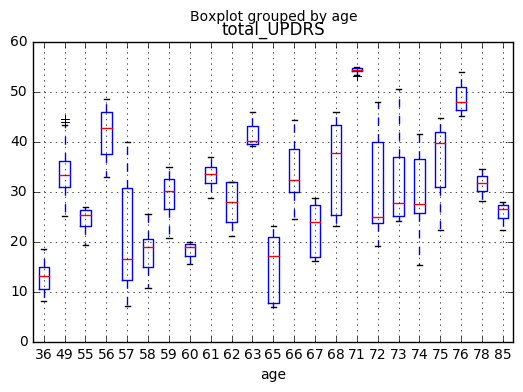

In [13]:
%matplotlib inline
dataset.boxplot(column='total_UPDRS', by='age')

A similar conclusion to the motor_UPDRS score with respect to age could be drawn from the total_UPDRS by age box plot.
This also shows me that there is a strong correleation between motor_UPDRS and total_UPDRS. I would visually investigate this further. 

First, I would like to visualize the relationship between the motor_UPDRS and total_UPDRS of the data set and then visualize the correlation

First I would isolate these two variables from the dataset

In [17]:
m_UPDRS = dataset.iloc[:, 4].values
t_UPDRS = dataset.iloc[:, 5].values
m_UPDRS

array([28.199, 28.447, 28.695, ..., 21.495, 21.007, 20.513])

In [18]:
t_UPDRS

array([34.398, 34.894, 35.389, ..., 32.495, 32.007, 31.513])

Now I can visualize the result in a plot

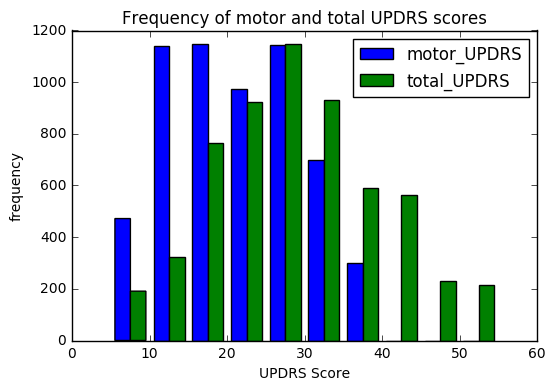

In [19]:
plt.hist([m_UPDRS, t_UPDRS], color = ['blue', 'green'])
plt.xlabel('UPDRS Score')
plt.ylabel('frequency')
legend = ['motor_UPDRS', 'total_UPDRS']
plt.legend(legend)
plt.title('Frequency of motor and total UPDRS scores')
plt.show()

Analyzing the statistics above and various plots, I am confident in the quality of the data. There are no noticable outliers or any major distraction.

It's now time to understand the correlation between all the variables of the dataset in order to further my model data preparation 

Graphical visualization for me can present all the variables at a glance

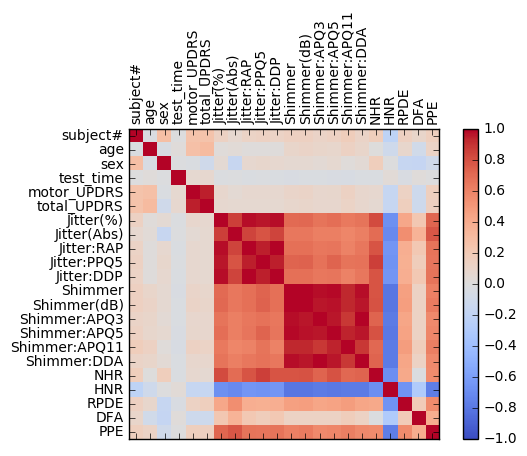

In [20]:
corr = dataset.corr()
fig = plt.figure()
ax= fig.add_subplot(111)
cax= ax.matshow(corr, cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0, len(dataset.columns), 1)
ax.set_xticks(ticks)
plt.xticks(rotation = 90)
ax.set_yticks(ticks)
ax.set_xticklabels(dataset.columns)
ax.set_yticklabels(dataset.columns)
plt.show()

From the correlation result, analysis shows total_UPDRS and motor_UPDRS have very high correlation. These features are however the dependent variables and the others would form the independent variables used to train the model.

## Further Data Preparation and Model Training

I can now conveniently split the dataset by extracting the independent and dependent variables into separate datasets

In [21]:
X = dataset.iloc[:, [0, 1, 2, 3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21]].values
y = dataset.iloc[:, [4, 5]].values

Viewing datasets X and y metrics

In [22]:
X

array([[ 1.     , 72.     ,  0.     , ...,  0.41888,  0.54842,  0.16006],
       [ 1.     , 72.     ,  0.     , ...,  0.43493,  0.56477,  0.1081 ],
       [ 1.     , 72.     ,  0.     , ...,  0.46222,  0.54405,  0.21014],
       ...,
       [42.     , 61.     ,  0.     , ...,  0.47792,  0.57888,  0.14157],
       [42.     , 61.     ,  0.     , ...,  0.56865,  0.56327,  0.14204],
       [42.     , 61.     ,  0.     , ...,  0.58608,  0.57077,  0.15336]])

In [23]:
y

array([[28.199, 34.398],
       [28.447, 34.894],
       [28.695, 35.389],
       ...,
       [21.495, 32.495],
       [21.007, 32.007],
       [20.513, 31.513]])

There are no test or validation data hence the need to split our current datasets (for X and y) to create a training set and test/validation set

### Model Option 1

Splitting the dataset into Training set and Test set. 

Since the number of data samples is 5875, I would like to use most of the data to train the model. I would therefore use 15% of the data to test or validate the model

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 0)

Viewing the split sets

In [25]:
X_train

array([[ 4.     , 74.     ,  0.     , ...,  0.62928,  0.59326,  0.16941],
       [31.     , 75.     ,  0.     , ...,  0.5439 ,  0.79194,  0.38303],
       [18.     , 65.     ,  0.     , ...,  0.46471,  0.64498,  0.14824],
       ...,
       [12.     , 62.     ,  0.     , ...,  0.55651,  0.69895,  0.325  ],
       [19.     , 55.     ,  0.     , ...,  0.51553,  0.73339,  0.34876],
       [20.     , 67.     ,  0.     , ...,  0.47292,  0.77725,  0.23529]])

In [26]:
X_test

array([[41.     , 68.     ,  1.     , ...,  0.55251,  0.70003,  0.25145],
       [35.     , 71.     ,  0.     , ...,  0.64566,  0.7499 ,  0.41199],
       [23.     , 59.     ,  1.     , ...,  0.50386,  0.69314,  0.17536],
       ...,
       [23.     , 59.     ,  1.     , ...,  0.55973,  0.66422,  0.18356],
       [29.     , 78.     ,  0.     , ...,  0.40528,  0.64744,  0.11933],
       [41.     , 68.     ,  1.     , ...,  0.47174,  0.63153,  0.30163]])

In [27]:
y_train

array([[13.4   , 19.829 ],
       [20.092 , 24.084 ],
       [ 5.5373,  7.    ],
       ...,
       [15.    , 23.122 ],
       [18.    , 26.002 ],
       [11.117 , 16.559 ]])

In [28]:
y_test

array([[29.635, 37.635],
       [36.153, 54.153],
       [12.664, 26.443],
       ...,
       [12.412, 26.274],
       [23.888, 31.107],
       [33.204, 41.204]])

Now it is time to train the model using the X_train and y_train datasats.

My model of choice is the Random Forest Regression Model.

Note that due to the fact that this is a multivariate regression task/project, it would be safe to disregard some regression models that only deal with one dependent variable regardless of the number of independent variables.

Decision Tree and Random Forest spring to my mind. However, after testing both I made the performance choice to use Random Forest.

In order not to increase the length of this presentation, I would restrict this to my chosen Random Forest Regression model

Importing from the sklearn library, initiating and fitting Random Forest Regression to the Training set

For option 1 , random_state = 0 (would be this way for the entire project) and n_estimators = 10 trees in the forest. For now I would consider all other parameters using their default values.

In [29]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators= 10, random_state = 0)
regressor.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

Now the model has been trained, it's time to make predictions on the Test set

Predicting the Test set result and to check linear relationship between the real and predicted results

In [30]:
y_pred = regressor.predict(X_test)

viewing y_pred and y_test

In [31]:
y_pred

array([[29.593   , 37.593   ],
       [36.1766  , 54.1766  ],
       [12.6542  , 25.277575],
       ...,
       [12.5112  , 26.3405  ],
       [23.8659  , 31.0304  ],
       [33.0258  , 41.0258  ]])

In [32]:
y_test

array([[29.635, 37.635],
       [36.153, 54.153],
       [12.664, 26.443],
       ...,
       [12.412, 26.274],
       [23.888, 31.107],
       [33.204, 41.204]])

The test/validation results matches the predicted results to a good degree as noticed. I would further analyse this 

Using Regression model performance metrics from sklearn library

Viewing the Variance score

In [33]:
from sklearn import metrics
metrics.explained_variance_score(y_test, y_pred)

0.9985243901013299

Viewing the mean absolute error MAE

In [34]:
metrics.mean_absolute_error(y_test, y_pred)

0.13838613962337587

On a scale from 0 to 10, this shows that the model predicted values are out of tune by 0.138 which tells me that the model is doing well

I would consider two more performance checks 

Mean Squared Errors

In [35]:
metrics.mean_squared_error(y_test, y_pred)

0.12371875178231359

R squared 

In [36]:
metrics.r2_score(y_test, y_pred)

0.9985230600834439

## Model Performance Improvement 

Before I go further, I would attempt to re-train the model with higher number of trees in a bid to improve the model

Re-Training the model using 50 trees

### Model Option 2

In [37]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators= 50, random_state = 0)
regressor.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=None,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

Predicting the Test set result

In [38]:
y_pred = regressor.predict(X_test)

Viewing the new predicted value and y_test

In [39]:
y_pred

array([[29.60496 , 37.60496 ],
       [36.1988  , 54.1988  ],
       [12.6318  , 26.189631],
       ...,
       [12.38144 , 26.2539  ],
       [23.86382 , 31.02302 ],
       [33.0495  , 41.0495  ]])

In [40]:
y_test

array([[29.635, 37.635],
       [36.153, 54.153],
       [12.664, 26.443],
       ...,
       [12.412, 26.274],
       [23.888, 31.107],
       [33.204, 41.204]])

Visually comparing the model prediction results with 50 trees to 10 trees, I would say is no significant difference especially when considering any slight improvement against performance

I would however carry out a quick performance check for MAE and variance

Viewing the Variance score

In [41]:
metrics.explained_variance_score(y_test, y_pred)

0.9986371713397835

No significant defference when using 10 trees compared to 50 trees with variance 

10 trees 0.9985243901013299, 50 trees 0.9986371713397835

This confirms my visual inspection

MAE

In [42]:
metrics.mean_absolute_error(y_test, y_pred)

0.12330976291396836

There is a slight improvement in MAE when using 50 trees at 0.12330976291396836 compared to 10 trees at 0.13838613962337587 

For the sake of this improvement, I would keep the number of trees at 50 for now before drawing further conclusions.

## Improving the model further

At this point, I would consider the usefullness of all the variables used to train the model and remove all unnecessary variables 

Getting the numerical feature variable importance

First, I would get the X dataset but this time with the column names as a new dataset

In [44]:
X_variables = dataset.iloc[:, [0, 1, 2, 3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21]]
dataset_list = list(X_variables.columns)

In [45]:
X_variables

,subject#,age,sex,test_time,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP,Shimmer,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
0,1,72,0,5.64310,0.00662,0.000034,0.00401,0.00317,0.01204,0.02565,0.230,0.01438,0.01309,0.01662,0.04314,0.014290,21.640,0.41888,0.54842,0.160060
1,1,72,0,12.66600,0.00300,0.000017,0.00132,0.00150,0.00395,0.02024,0.179,0.00994,0.01072,0.01689,0.02982,0.011112,27.183,0.43493,0.56477,0.108100
2,1,72,0,19.68100,0.00481,0.000025,0.00205,0.00208,0.00616,0.01675,0.181,0.00734,0.00844,0.01458,0.02202,0.020220,23.047,0.46222,0.54405,0.210140
3,1,72,0,25.64700,0.00528,0.000027,0.00191,0.00264,0.00573,0.02309,0.327,0.01106,0.01265,0.01963,0.03317,0.027837,24.445,0.48730,0.57794,0.332770
4,1,72,0,33.64200,0.00335,0.000020,0.00093,0.00130,0.00278,0.01703,0.176,0.00679,0.00929,0.01819,0.02036,0.011625,26.126,0.47188,0.56122,0.193610
5,1,72,0,40.65200,0.00353,0.000023,0.00119,0.00159,0.00357,0.02227,0.214,0.01006,0.01337,0.02263,0.03019,0.009438,22.946,0.53949,0.57243,0.195000
6,1,72,0,47.64900,0.00422,0.000024,0.00212,0.00221,0.00637,0.04352,0.445,0.02376,0.02621,0.03488,0.07128,0.013260,22.506,0.49250,0.54779,0.175630
7,1,72,0,54.64000,0.00476,0.000025,0.00226,0.00259,0.00678,0.02191,0.212,0.00979,0.01462,0.01911,0.02937,0.027969,22.929,0.47712,0.54234,0.238440
8,1,72,0,61.66900,0.00432,0.000029,0.00156,0.00207,0.00468,0.04296,0.371,0.01774,0.02134,0.03451,0.05323,0.013381,22.078,0.51563,0.61864,0.200370
9,1,72,0,68.68800,0.00496,0.000027,0.00258,0.00253,0.00773,0.03610,0.310,0.02030,0.01970,0.02569,0.06089,0.018021,22.606,0.50032,0.58673,0.201170


In [46]:
importances = list(regressor.feature_importances_)
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(dataset_list, importances)]
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: subject#             Importance: 0.5
Variable: age                  Importance: 0.36
Variable: test_time            Importance: 0.07
Variable: DFA                  Importance: 0.04
Variable: sex                  Importance: 0.02
Variable: RPDE                 Importance: 0.01
Variable: Jitter(%)            Importance: 0.0
Variable: Jitter(Abs)          Importance: 0.0
Variable: Jitter:RAP           Importance: 0.0
Variable: Jitter:PPQ5          Importance: 0.0
Variable: Jitter:DDP           Importance: 0.0
Variable: Shimmer              Importance: 0.0
Variable: Shimmer(dB)          Importance: 0.0
Variable: Shimmer:APQ3         Importance: 0.0
Variable: Shimmer:APQ5         Importance: 0.0
Variable: Shimmer:APQ11        Importance: 0.0
Variable: Shimmer:DDA          Importance: 0.0
Variable: NHR                  Importance: 0.0
Variable: HNR                  Importance: 0.0
Variable: PPE                  Importance: 0.0


From the result table above, it shows that subject# accounts for 50% in determining the multivariate dependent variables, followed by age at 36%, test_time at 7%, DFA at 4%, sex at 2% and RPDE at 1%

What this means is that only 6 variables contribute any significance in training the model to determine the motor_UPDRS and total_UPDRS. Therefore I do not need to include the remaining 14 variabes 

Visually representing these variables of importance obtained above and their level of importance would yield...

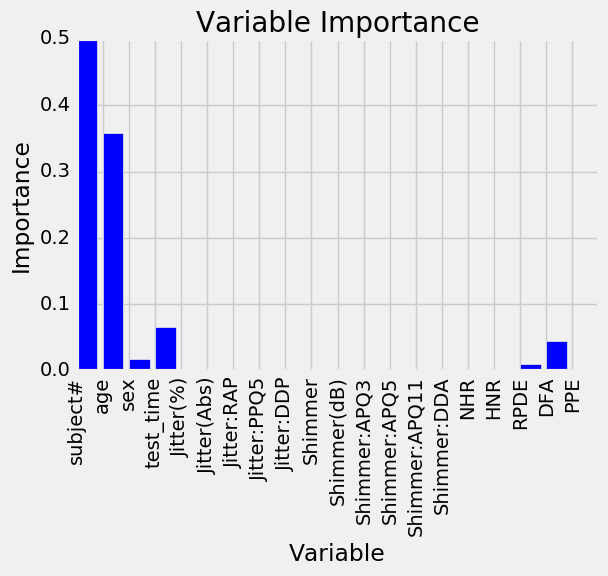

In [78]:
plt.style.use('fivethirtyeight')
x_values = list(range(len(importances)))
plt.bar(x_values, importances, orientation = 'vertical')
plt.xticks(x_values, dataset_list, rotation='vertical')
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importance');

At this point, I would retune the model using only the 6 important variables as observed above. I would like to compare the results of using these 6 important variables to using the top 3 important variables (accounting for 93% of model determinant).

## Improving the model Performance

At this point, I would consider the top 3 important variables: Subject#, age and test_time (columns 0, 1, and 3 respectively) and use this new information to improve the model

A new X (independent variable) dataset would be created containing the top 3 important variables for the model training.
y could be left as it is but for consistency, I would create another y dataset 

### Model Option 3

In [48]:
X_new = dataset.iloc[:, [0, 1, 3]].values
y_new = dataset.iloc[:, [4, 5]].values


Viewing the X_new and y_new detasets

In [49]:
X_new

array([[  1.    ,  72.    ,   5.6431],
       [  1.    ,  72.    ,  12.666 ],
       [  1.    ,  72.    ,  19.681 ],
       ...,
       [ 42.    ,  61.    , 156.82  ],
       [ 42.    ,  61.    , 163.73  ],
       [ 42.    ,  61.    , 170.73  ]])

In [50]:
y_new

array([[28.199, 34.398],
       [28.447, 34.894],
       [28.695, 35.389],
       ...,
       [21.495, 32.495],
       [21.007, 32.007],
       [20.513, 31.513]])

Splitting the dataset into the Training set and Test set

In [51]:
from sklearn.model_selection import train_test_split
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_new, y_new, test_size = 0.15, random_state = 0)

Viewing the training and test sets

In [52]:
X_train_new

array([[  4.  ,  74.  ,  44.69],
       [ 31.  ,  75.  , 188.3 ],
       [ 18.  ,  65.  , 130.39],
       ...,
       [ 12.  ,  62.  , 175.19],
       [ 19.  ,  55.  , 195.79],
       [ 20.  ,  67.  , 144.92]])

In [53]:
y_train_new

array([[13.4   , 19.829 ],
       [20.092 , 24.084 ],
       [ 5.5373,  7.    ],
       ...,
       [15.    , 23.122 ],
       [18.    , 26.002 ],
       [11.117 , 16.559 ]])

In [54]:
X_test_new

array([[ 41.   ,  68.   ,   7.484],
       [ 35.   ,  71.   ,  13.422],
       [ 23.   ,  59.   , 163.41 ],
       ...,
       [ 23.   ,  59.   , 170.47 ],
       [ 29.   ,  78.   , 149.37 ],
       [ 41.   ,  68.   ,  49.517]])

In [55]:
y_test_new

array([[29.635, 37.635],
       [36.153, 54.153],
       [12.664, 26.443],
       ...,
       [12.412, 26.274],
       [23.888, 31.107],
       [33.204, 41.204]])

Re-Fitting Random Forest Regression model to the Training set with the 3 most important variables using 10 trees 

In [57]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators= 10, max_features=3, random_state = 0)
regressor.fit(X_train_new, y_train_new)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=3, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=None, oob_score=False, random_state=0,
           verbose=0, warm_start=False)

Predicting the Test set result

In [58]:
y_pred_new = regressor.predict(X_test_new)

Checking the model performance for variance and Mean Absolute Error MAE

In [59]:
from sklearn import metrics
metrics.explained_variance_score(y_test_new, y_pred_new)

0.9999913917545199

There is certainly an improvement in the variance compared to the two previous model options.


MAE

In [60]:
metrics.mean_absolute_error(y_test_new, y_pred_new)

0.008977394803996147

Significant improvement compared to training the model with all variables in terms of the difference between the test and predicted results

Recapping the statistical checks of the trained model

Model Option 1: Variance with all independent variables and 10 trees = 0.9985243901013299

Model Option 2: Variance with all independent variables and 50 trees = 0.9986371713397835

Model Option 3: Variance with 3 most important independent variables and 10 trees = 0.9999913917545199


Model Option 1: MAE with all independent variables and 10 trees = 0.13838613962337587

Model Option 2: MAE with all independent variables and 50 trees = 0.12330976291396836

Model Option 3: MAE with 3 most important independent variables and 10 trees = 0.008977394803996147


Now I would try re-tunning the model with all 6 important independent variables to determine any model improvement

### Model Option 4

In [61]:
X_new_6 = dataset.iloc[:, [0, 1, 2, 3, 19, 20]].values


Splitting the dataset into the Training set and Test set

In [62]:
from sklearn.model_selection import train_test_split
X_train_new_6, X_test_new_6, y_train_new, y_test_new = train_test_split(X_new_6, y_new, test_size = 0.15, random_state = 0)

In [63]:
X_train_new_6

array([[  4.     ,  74.     ,   0.     ,  44.69   ,   0.62928,   0.59326],
       [ 31.     ,  75.     ,   0.     , 188.3    ,   0.5439 ,   0.79194],
       [ 18.     ,  65.     ,   0.     , 130.39   ,   0.46471,   0.64498],
       ...,
       [ 12.     ,  62.     ,   0.     , 175.19   ,   0.55651,   0.69895],
       [ 19.     ,  55.     ,   0.     , 195.79   ,   0.51553,   0.73339],
       [ 20.     ,  67.     ,   0.     , 144.92   ,   0.47292,   0.77725]])

Re-Fitting Random Forest Regression model to the Training set with all 6 most important variables using 10 trees

In [64]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators= 10, max_features=6, random_state = 0)
regressor.fit(X_train_new_6, y_train_new)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=6, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=None, oob_score=False, random_state=0,
           verbose=0, warm_start=False)

Predicting the Test set result using all 6 important independent variables to train the model

In [65]:
y_pred_new_6 = regressor.predict(X_test_new_6)

Checking the model performance for variance and Mean Absolute Error MAE

In [67]:
metrics.explained_variance_score(y_test_new, y_pred_new_6)

0.9992353251016131

In [69]:
metrics.mean_absolute_error(y_test_new, y_pred_new_6)

0.07797215368512078

Recapping the statistical checks of the trained model

Model Option1: Variance with all independent variables and 10 trees = 0.9985243901013299

Model Option2: Variance with all independent variables and 50 trees = 0.9986371713397835

Model Option3: Variance with 3 most important independent variables and 10 trees = 0.9999913917545199

Model Option4: Variance with 6 most important independent variables and 10 trees = 0.9992353251016131


Model Option1: MAE with all independent variables and 10 trees = 0.13838613962337587

Model Option2: MAE with all independent variables and 50 trees = 0.12330976291396836

Model Option3: MAE with 3 most important independent variables and 10 trees = 0.008977394803996147

Model Option4: MAE with 6 most important independent variables and 10 trees = 0.07797215368512078

Very interesting results here. It can be observed that using 6 important independent variables did not exactly improve the model compared to option 3 which accounted for 93% of the important variables

one more model performance check would now be carried out using the best model performance criteria so far which is option 3

This time I would use 50 trees as opposed to 10, which I considered in option 3.

### Model Option 5

Using 3 most important variables and 50 trees

Re-Fitting Random Forest Regression model to the Training set with the 3 most important variables using 50 trees 

In [70]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators= 50, max_features=3, random_state = 0)
regressor.fit(X_train_new, y_train_new)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=3, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=50, n_jobs=None, oob_score=False, random_state=0,
           verbose=0, warm_start=False)

Predicting the Test set result

In [71]:
y_pred_new_50t = regressor.predict(X_test_new)

Checking the model performance for variance and Mean Absolute Error MAE in Option 5

In [73]:
metrics.explained_variance_score(y_test_new, y_pred_new_50t)

0.9999935089558065

In [74]:
metrics.mean_absolute_error(y_test_new, y_pred_new_50t)

0.009575012422662331

Recapping the statistical checks of the trained model

Model Option1: Variance with all independent variables and 10 trees = 0.9985243901013299

Model Option2: Variance with all independent variables and 50 trees = 0.9986371713397835

Model Option3: Variance with 3 most important independent variables and 10 trees = 0.9999913917545199

Model Option4: Variance with 6 most important independent variables and 10 trees = 0.9992353251016131

Model Option5: Variance with 3 most important independent variables and 50 trees = 0.9999935089558065   


Model Option1: MAE with all independent variables and 10 trees = 0.13838613962337587

Model Option2: MAE with all independent variables and 50 trees = 0.12330976291396836

Model Option3: MAE with 3 most important independent variables and 10 trees = 0.008977394803996147

Model Option4: MAE with 6 most important independent variables and 10 trees = 0.07797215368512078

Model Option5: MAE with 3 most important independent variables and 50 trees = 0.009575012422662331    

As observed in the case of option 5, increasing the number of trees in the Random Forest model slightly improved the model. However, this now brings about the problem of overfitting as can be seen from the mean absolute error comparing the model prediction result to the test set

In Conclusion,

In order to best train the model and avoid overfitting, the optimal set of model parameters to be considered are:
Using the Random Forest Regression Model
Training the model with the 3 most significnt independent variables of subject#, age and test_time
Number of trees to be considered are 10 trees.

This is represented by Random Forest Regression model Option 3

Therefore the best Machine Learning model performance for the project and parameters is represented in Option 3

In [75]:
y_test

array([[29.635, 37.635],
       [36.153, 54.153],
       [12.664, 26.443],
       ...,
       [12.412, 26.274],
       [23.888, 31.107],
       [33.204, 41.204]])

In [76]:
y_pred_new

array([[29.6351  , 37.6351  ],
       [36.1528  , 54.1528  ],
       [12.664   , 26.442875],
       ...,
       [12.412   , 26.274   ],
       [23.888   , 31.107   ],
       [33.204   , 41.204   ]])

The visual inspection of the actual data and predicted data for both motor_UPDRS and total_UPDRS can seen to be very close in value thus validating the trained model and various performance parameters selected.